Importing libraries


In [29]:
# Import libraries
import json  # To work with JSON files
import pandas as pd  # For data analysis and manipulation
import random  # To shuffle the data for randomness




Loading the data set, 158 documents

In [30]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import json

# File path to your JSON file
file_path = "/content/drive/MyDrive/Colab Notebooks/ArabicDataSet.json"
try:
    # Load the JSON file
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)

    # Print total number of documents and a sample
    print(f"Total documents loaded: {len(data)}")
    print("Sample document:", data[0])  # Display the first document
except json.JSONDecodeError as e:
    print(f"JSONDecodeError: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Total documents loaded: 158
Sample document: {'ID': 1, 'Document': 'الأكل الصحي يُعتبر جزءًا أساسيًا من نمط الحياة المتوازن. تناول الأطعمة الغنية بالفيتامينات والمعادن، مثل الخضروات والفواكه، يُعزز الصحة العامة ويُقلل من مخاطر الأمراض. الأطعمة الغنية بالألياف تُساعد على تحسين الهضم، بينما يُساهم تناول البروتينات الصحية في بناء العضلات وتقوية الجسم. الابتعاد عن الأطعمة المصنعة والمشبعة بالدهون يُساهم في تقليل مستويات الكوليسترول في الدم. تحقيق التوازن بين أنواع الطعام المختلفة، بالإضافة إلى شرب الماء بكميات كافية، يضمن الحفاظ على طاقة الجسم طوال اليوم.', 'Summary': 'الأكل الصحي يُعزز الصحة العامة ويُقلل من مخاطر الأمراض.', 'Category': 'Short', 'Topic': 'فوائد الأكل الصحي', 'Split': 'Train'}


Analyzing and processing the data set file

 Inspect the Structure of the First Few Documents and Display Keys in the Dataset:

In [32]:
# Check the structure of the first few documents
print("\nInspecting the first few documents:")
for i in range(min(5, len(data))):
    print(f"Document {i + 1}:")
    print(data[i])

# Display keys in the dataset
print("\nKeys in the document:")
print(data[0].keys())



Inspecting the first few documents:
Document 1:
{'ID': 1, 'Document': 'الأكل الصحي يُعتبر جزءًا أساسيًا من نمط الحياة المتوازن. تناول الأطعمة الغنية بالفيتامينات والمعادن، مثل الخضروات والفواكه، يُعزز الصحة العامة ويُقلل من مخاطر الأمراض. الأطعمة الغنية بالألياف تُساعد على تحسين الهضم، بينما يُساهم تناول البروتينات الصحية في بناء العضلات وتقوية الجسم. الابتعاد عن الأطعمة المصنعة والمشبعة بالدهون يُساهم في تقليل مستويات الكوليسترول في الدم. تحقيق التوازن بين أنواع الطعام المختلفة، بالإضافة إلى شرب الماء بكميات كافية، يضمن الحفاظ على طاقة الجسم طوال اليوم.', 'Summary': 'الأكل الصحي يُعزز الصحة العامة ويُقلل من مخاطر الأمراض.', 'Category': 'Short', 'Topic': 'فوائد الأكل الصحي', 'Split': 'Train'}
Document 2:
{'ID': 2, 'Document': 'القراءة تُعد مفتاحًا لبناء عقل ناضج ومبدع. عندما تقرأ، تُبحر في عوالم جديدة وتكتسب معارف قد لا تجدها في مكان آخر. تساعد القراءة على تحسين التركيز وتقوية الذاكرة. كما تُسهم في تنمية المفردات وتعزيز القدرة على التعبير بوضوح. قراءة الروايات تمنح القارئ فرصة لفهم مش

In [33]:
# Identify documents with missing fields
missing_docs = [doc for doc in data if any(value == "" or value is None for value in doc.values())]

# Print number of problematic documents
print(f"Number of documents with missing values: {len(missing_docs)}")

# Remove problematic documents from the dataset
data = [doc for doc in data if all(value != "" and value is not None for value in doc.values())]

# Verify the cleaned dataset
print(f"Total documents after cleaning: {len(data)}")


Number of documents with missing values: 0
Total documents after cleaning: 158



Dataset Summary:
         ID                                           Document  \
count   158                                                158   
unique  158                                                158   
top       1  الأكل الصحي يُعتبر جزءًا أساسيًا من نمط الحياة...   
freq      1                                                  1   

                                                  Summary Category  Topic  \
count                                                 158      158    158   
unique                                                158        3    148   
top     الأكل الصحي يُعزز الصحة العامة ويُقلل من مخاطر...    Short  Music   
freq                                                    1       72     10   

        Split  
count     158  
unique      8  
top     Train  
freq      106  

Document Length Statistics:
count     158.000000
mean      758.139241
std       542.232980
min       151.000000
25%       326.500000
50%       558.500000
75%      1115.000000
max      

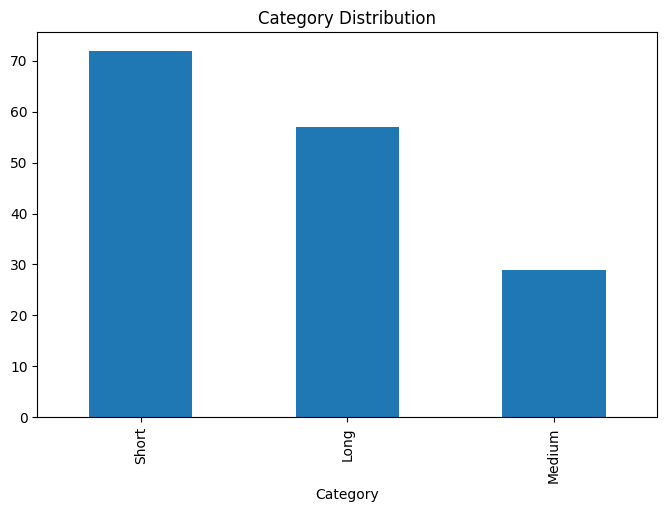

In [34]:
# Convert the data into a DataFrame for easier analysis
df = pd.DataFrame(data)

# Check basic statistics
print("\nDataset Summary:")
print(df.describe(include="all"))

# Analyze document lengths
df['doc_length'] = df['Document'].apply(len)
print("\nDocument Length Statistics:")
print(df['doc_length'].describe())

# Plot document lengths
df['doc_length'].hist(bins=20, figsize=(8, 5))
# Analyze category distribution
print("\nCategory Distribution:")
print(df['Category'].value_counts())

# Analyze topic distribution
print("\nTopic Distribution:")
print(df['Topic'].value_counts())

# Visualize the category distribution
df['Category'].value_counts().plot(kind='bar', figsize=(8, 5), title="Category Distribution")
# Check for duplicate documents
duplicate_docs = df[df.duplicated(subset='Document', keep=False)]

print(f"\nNumber of duplicate documents: {len(duplicate_docs)}")

# Drop duplicates if needed
df = df.drop_duplicates(subset='Document')
print(f"Total documents after removing duplicates: {len(df)}")




Text normalization


In [35]:
# Install libraries for Arabic NLP and feature extraction
!pip install nltk camel-tools scikit-learn transformers
import nltk
nltk.download('punkt', force=True)
  # Download tokenization resources
import re
from nltk.tokenize import word_tokenize
from camel_tools.utils.dediac import dediac_ar

def normalize_text(text):
    # Remove diacritics
    text = dediac_ar(text)
    # Normalize characters
    text = re.sub(r'[إأآا]', 'ا', text)
    text = re.sub(r'ة', 'ه', text)
    text = re.sub(r'ى', 'ي', text)
    # Remove punctuation and non-Arabic characters
    text = re.sub(r'[^ء-ي\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply normalization to the dataset
df['Document'] = df['Document'].apply(normalize_text)
print("Text normalization complete!")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Text normalization complete!


In [36]:
import nltk
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize

# Tokenize the documents
df['tokens'] = df['Document'].apply(word_tokenize)

# Check tokenized output
print("Sample tokens:", df['tokens'].iloc[0])


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Sample tokens: ['الاكل', 'الصحي', 'يعتبر', 'جزءا', 'اساسيا', 'من', 'نمط', 'الحياه', 'المتوازن', 'تناول', 'الاطعمه', 'الغنيه', 'بالفيتامينات', 'والمعادن', 'مثل', 'الخضروات', 'والفواكه', 'يعزز', 'الصحه', 'العامه', 'ويقلل', 'من', 'مخاطر', 'الامراض', 'الاطعمه', 'الغنيه', 'بالالياف', 'تساعد', 'علي', 'تحسين', 'الهضم', 'بينما', 'يساهم', 'تناول', 'البروتينات', 'الصحيه', 'في', 'بناء', 'العضلات', 'وتقويه', 'الجسم', 'الابتعاد', 'عن', 'الاطعمه', 'المصنعه', 'والمشبعه', 'بالدهون', 'يساهم', 'في', 'تقليل', 'مستويات', 'الكوليسترول', 'في', 'الدم', 'تحقيق', 'التوازن', 'بين', 'انواع', 'الطعام', 'المختلفه', 'بالاضافه', 'الي', 'شرب', 'الماء', 'بكميات', 'كافيه', 'يضمن', 'الحفاظ', 'علي', 'طاقه', 'الجسم', 'طوال', 'اليوم']


**Feature engineering:**
1. Word Count and Unique Word Count
Useful for understanding document complexity.

In [37]:
df['word_count'] = df['tokens'].apply(len)
df['unique_word_count'] = df['tokens'].apply(lambda x: len(set(x)))

print("Feature engineering complete!")
print(df[['word_count', 'unique_word_count']].describe())


Feature engineering complete!
       word_count  unique_word_count
count  158.000000         158.000000
mean   120.702532          96.088608
std     87.311910          61.032870
min     21.000000          21.000000
25%     51.500000          48.250000
50%     88.000000          75.000000
75%    177.750000         139.000000
max    430.000000         286.000000


2. TF-IDF (Term Frequency-Inverse Document Frequency)
Measures the importance of words in a document relative to the corpus.

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000, token_pattern=r"(?u)\b\w+\b")

# Fit and transform the DOCUMENT column
tfidf_matrix = vectorizer.fit_transform(df['Document'])
print("TF-IDF matrix shape:", tfidf_matrix.shape)


TF-IDF matrix shape: (158, 1000)


3. Embedding Features
Generate word or document embeddings using pre-trained models.

In [39]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load pre-trained AraBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv02")
model = AutoModel.from_pretrained("aubmindlab/bert-base-arabertv02")

# Generate embeddings for a sample document
text = df['Document'].iloc[0]
inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
outputs = model(**inputs)
embedding = outputs.last_hidden_state.mean(dim=1).squeeze()

print("Sample embedding shape:", embedding.shape)


Sample embedding shape: torch.Size([768])


In [40]:
# Shuffle the data
random.shuffle(data)

# Define split proportions
total_docs = len(data)
train_size = int(0.7 * total_docs)
val_size = int(0.15 * total_docs)

# Split the data
train_data = data[:train_size]
val_data = data[train_size:train_size + val_size]
test_data = data[train_size + val_size:]

# Verify the splits
print(f"Training set: {len(train_data)} documents")
print(f"Validation set: {len(val_data)} documents")
print(f"Test set: {len(test_data)} documents")


Training set: 110 documents
Validation set: 23 documents
Test set: 25 documents


In [41]:
# Save the splits into separate JSON files
output_paths = {
    "train": "/content/drive/MyDrive/Colab Notebooks/train_data.json",
    "validate": "/content/drive/MyDrive/Colab Notebooks/val_data.json",
    "test": "/content/drive/MyDrive/Colab Notebooks/test_data.json"
}

for split_name, split_data in zip(output_paths.keys(), [train_data, val_data, test_data]):
    with open(output_paths[split_name], "w", encoding="utf-8") as f:
        json.dump(split_data, f, ensure_ascii=False, indent=4)

print("Data splits saved successfully!")


Data splits saved successfully!


1.AraBER Model

In [42]:
!pip install transformers datasets torch nltk scikit-learn rouge


Load and prepare the dataset

In [43]:
import json

# Paths to the datasets
train_path = "/content/drive/MyDrive/Colab Notebooks/train_data.json"
val_path = "/content/drive/MyDrive/Colab Notebooks/val_data.json"
test_path = "/content/drive/MyDrive/Colab Notebooks/test_data.json"

# Load the datasets
with open(train_path, "r", encoding="utf-8") as f:
    train_data = json.load(f)

with open(val_path, "r", encoding="utf-8") as f:
    val_data = json.load(f)

with open(test_path, "r", encoding="utf-8") as f:
    test_data = json.load(f)

# Print dataset sizes
print(f"Training Set: {len(train_data)} documents")
print(f"Validation Set: {len(val_data)} documents")
print(f"Test Set: {len(test_data)} documents")


Training Set: 110 documents
Validation Set: 23 documents
Test Set: 25 documents


Prepare Training Data

In [44]:
from nltk.tokenize import sent_tokenize

def prepare_training_data(data):
    dataset = []
    for doc in data:
        document_text = doc["Document"]
        summary_text = doc["Summary"]

        # Tokenize document into sentences
        sentences = sent_tokenize(document_text)

        # Label sentences: 1 if in summary, 0 otherwise
        labels = [1 if sent in summary_text else 0 for sent in sentences]

        for sent, label in zip(sentences, labels):
            dataset.append({"sentence": sent, "label": label})
    return dataset

# Prepare training and validation datasets
train_dataset = prepare_training_data(train_data)
val_dataset = prepare_training_data(val_data)

print(f"Training examples: {len(train_dataset)}")
print(f"Validation examples: {len(val_dataset)}")


Training examples: 640
Validation examples: 159


Convert Data to HuggingFace Dataset

In [45]:
from datasets import Dataset

# Convert training and validation data to HuggingFace Dataset format
train_hf = Dataset.from_dict({
    "text": [example["sentence"] for example in train_dataset],
    "label": [example["label"] for example in train_dataset],
})

val_hf = Dataset.from_dict({
    "text": [example["sentence"] for example in val_dataset],
    "label": [example["label"] for example in val_dataset],
})

print(train_hf)
print(val_hf)


Dataset({
    features: ['text', 'label'],
    num_rows: 640
})
Dataset({
    features: ['text', 'label'],
    num_rows: 159
})


Tokenize the Data

In [46]:
from transformers import AutoTokenizer

# Load AraBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv02")

# Tokenize the data
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding=True, max_length=512)

train_hf = train_hf.map(tokenize_function, batched=True)
val_hf = val_hf.map(tokenize_function, batched=True)

print(train_hf[0])


Map:   0%|          | 0/640 [00:00<?, ? examples/s]

Map:   0%|          | 0/159 [00:00<?, ? examples/s]

{'text': 'الفازلين هو منتج متعدد الاستخدامات اكتُشف في القرن التاسع عشر، وأصبح من أكثر المنتجات انتشاراً في العالم.', 'label': 0, 'input_ids': [2, 5886, 44353, 186, 583, 8863, 18785, 33635, 1, 305, 2890, 6109, 1292, 103, 7628, 306, 853, 5899, 1, 305, 619, 20, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Load AraBERT for Fine-Tuning

In [47]:
from transformers import AutoModelForSequenceClassification

# Load AraBERT pre-trained model for binary classification
model = AutoModelForSequenceClassification.from_pretrained("aubmindlab/bert-base-arabertv02", num_labels=2)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [48]:
from transformers import TrainingArguments, Trainer
import os  # Import the os module
# Disable WandB logging
os.environ["WANDB_DISABLED"] = "true"

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_total_limit=2,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_hf,
    eval_dataset=val_hf,
    tokenizer=tokenizer,
)

# Fine-tune the model
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss
1,No log,0.000389
2,No log,0.000195


Epoch,Training Loss,Validation Loss
1,No log,0.000389
2,No log,0.000195
3,No log,0.000158


TrainOutput(global_step=240, training_loss=0.013261889417966207, metrics={'train_runtime': 3674.1452, 'train_samples_per_second': 0.523, 'train_steps_per_second': 0.065, 'total_flos': 137146637606400.0, 'train_loss': 0.013261889417966207, 'epoch': 3.0})

In [49]:
trainer.evaluate()




{'eval_loss': 0.00015759948291815817,
 'eval_runtime': 38.6236,
 'eval_samples_per_second': 4.117,
 'eval_steps_per_second': 0.518,
 'epoch': 3.0}

In [58]:
trainer.save_model("./trained_arabert_model")


In [59]:
# Predict important sentences for test documents
def predict_summary(text, num_sentences=3):
    sentences = sent_tokenize(text)
    inputs = tokenizer(sentences, truncation=True, padding=True, return_tensors="pt", max_length=512)
    outputs = model(**inputs)
    scores = outputs.logits[:, 1].detach().numpy()  # Importance scores for each sentence
    ranked_sentences = [sent for _, sent in sorted(zip(scores, sentences), reverse=True)]
    summary = " ".join(ranked_sentences[:num_sentences])
    return summary

# Apply to test data
for doc in test_data:
    doc["Generated_Summary"] = predict_summary(doc["Document"])

# Save the results
with open("/content/drive/MyDrive/Colab Notebooks/test_data.json", "w", encoding="utf-8") as f:
    json.dump(test_data, f, ensure_ascii=False, indent=4)

print("Summaries generated and saved!")


Summaries generated and saved!


In [63]:
from rouge import Rouge

# Initialize ROUGE scorer
rouge = Rouge()

# Evaluate the summaries
rouge_scores = []
for doc in test_data:
    reference = doc["Summary"]
    generated = doc["Generated_Summary"]
    scores = rouge.get_scores(generated, reference)
    rouge_scores.append(scores[0])

# Calculate average ROUGE scores
avg_rouge = {
    "rouge-1": {"f": 0, "p": 0, "r": 0},
    "rouge-2": {"f": 0, "p": 0, "r": 0},
    "rouge-l": {"f": 0, "p": 0, "r": 0},
}
for score in rouge_scores:
    for key in avg_rouge.keys():
        for metric in avg_rouge[key].keys():
            avg_rouge[key][metric] += score[key][metric]

num_docs = len(rouge_scores)
for key in avg_rouge.keys():
    for metric in avg_rouge[key].keys():
        avg_rouge[key][metric] /= num_docs

print("Average ROUGE Scores:", avg_rouge)


Average ROUGE Scores: {'rouge-1': {'f': 0.16467146181995518, 'p': 0.11652638774215586, 'r': 0.32206040627712457}, 'rouge-2': {'f': 0.05528585917129778, 'p': 0.03966994413500239, 'r': 0.1050708654357635}, 'rouge-l': {'f': 0.1520136517008441, 'p': 0.10791581725693289, 'r': 0.2942200701426707}}


2. BART Model

In [75]:
# 1. BART Setup

from transformers import BartTokenizer, BartForConditionalGeneration
from datasets import Dataset
import json

# Load the dataset from Google Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/ArabicDataSet.json"  # Adjust the path if needed
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Print total number of documents and a sample document
print(f"Total documents loaded: {len(data)}")
print("Sample document:", data[0])  # Display the first document

# Convert to HuggingFace Dataset format (based on your dataset structure)
dataset = Dataset.from_dict({
    "input": [doc["Document"] for doc in data],  # Assuming your data has a "Document" field
    "target": [doc["Summary"] for doc in data],  # Assuming your data has a "Summary" field
})

# Load the tokenizer and model for BART
bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
bart_model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')

# Tokenization function for BART
def tokenize_bart(examples):
    model_inputs = bart_tokenizer(examples["input"], truncation=True, padding="max_length", max_length=512)
    labels = bart_tokenizer(examples["target"], truncation=True, padding="max_length", max_length=150)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Apply the tokenization function to the dataset
train_hf_bart = dataset.map(tokenize_bart, batched=True)

# Check the first tokenized example for BART
print("BART Example:", train_hf_bart[0])

# Model Evaluation for BART (simple inference, for example)
inputs = bart_tokenizer("This is the input text for BART.", return_tensors="pt", truncation=True, padding="max_length", max_length=512)
summary_ids = bart_model.generate(inputs["input_ids"], max_length=150, num_beams=4, early_stopping=True)

# Decode and print the result
bart_summary = bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print("BART Summary:", bart_summary)


Total documents loaded: 158
Sample document: {'ID': 1, 'Document': 'الأكل الصحي يُعتبر جزءًا أساسيًا من نمط الحياة المتوازن. تناول الأطعمة الغنية بالفيتامينات والمعادن، مثل الخضروات والفواكه، يُعزز الصحة العامة ويُقلل من مخاطر الأمراض. الأطعمة الغنية بالألياف تُساعد على تحسين الهضم، بينما يُساهم تناول البروتينات الصحية في بناء العضلات وتقوية الجسم. الابتعاد عن الأطعمة المصنعة والمشبعة بالدهون يُساهم في تقليل مستويات الكوليسترول في الدم. تحقيق التوازن بين أنواع الطعام المختلفة، بالإضافة إلى شرب الماء بكميات كافية، يضمن الحفاظ على طاقة الجسم طوال اليوم.', 'Summary': 'الأكل الصحي يُعزز الصحة العامة ويُقلل من مخاطر الأمراض.', 'Category': 'Short', 'Topic': 'فوائد الأكل الصحي', 'Split': 'Train'}


Map:   0%|          | 0/158 [00:00<?, ? examples/s]

BART Example: {'input': 'الأكل الصحي يُعتبر جزءًا أساسيًا من نمط الحياة المتوازن. تناول الأطعمة الغنية بالفيتامينات والمعادن، مثل الخضروات والفواكه، يُعزز الصحة العامة ويُقلل من مخاطر الأمراض. الأطعمة الغنية بالألياف تُساعد على تحسين الهضم، بينما يُساهم تناول البروتينات الصحية في بناء العضلات وتقوية الجسم. الابتعاد عن الأطعمة المصنعة والمشبعة بالدهون يُساهم في تقليل مستويات الكوليسترول في الدم. تحقيق التوازن بين أنواع الطعام المختلفة، بالإضافة إلى شرب الماء بكميات كافية، يضمن الحفاظ على طاقة الجسم طوال اليوم.', 'target': 'الأكل الصحي يُعزز الصحة العامة ويُقلل من مخاطر الأمراض.', 'input_ids': [0, 43321, 21593, 2469, 26068, 862, 30992, 32681, 21593, 8906, 21593, 12410, 26174, 36963, 27969, 26068, 9357, 41688, 38605, 41117, 29434, 25790, 11582, 21593, 14292, 21593, 5543, 26068, 13859, 29438, 25790, 2469, 40637, 34955, 15264, 26174, 26068, 13859, 29438, 42620, 31746, 36963, 27819, 33070, 21593, 18400, 32681, 21593, 12410, 26174, 34955, 15375, 32681, 33070, 38605, 33866, 34955, 14292, 31746

In [76]:
from rouge import Rouge

# Initialize ROUGE scorer
rouge = Rouge()

# Evaluate the summaries
rouge_scores = []
for doc in test_data:
    reference = doc["Summary"]
    generated = doc["Generated_Summary"]
    scores = rouge.get_scores(generated, reference)
    rouge_scores.append(scores[0])

# Calculate average ROUGE scores
avg_rouge = {
    "rouge-1": {"f": 0, "p": 0, "r": 0},
    "rouge-2": {"f": 0, "p": 0, "r": 0},
    "rouge-l": {"f": 0, "p": 0, "r": 0},
}
for score in rouge_scores:
    for key in avg_rouge.keys():
        for metric in avg_rouge[key].keys():
            avg_rouge[key][metric] += score[key][metric]

num_docs = len(rouge_scores)
for key in avg_rouge.keys():
    for metric in avg_rouge[key].keys():
        avg_rouge[key][metric] /= num_docs

print("Average ROUGE Scores:", avg_rouge)


Average ROUGE Scores: {'rouge-1': {'f': 0.16467146181995518, 'p': 0.11652638774215586, 'r': 0.32206040627712457}, 'rouge-2': {'f': 0.05528585917129778, 'p': 0.03966994413500239, 'r': 0.1050708654357635}, 'rouge-l': {'f': 0.1520136517008441, 'p': 0.10791581725693289, 'r': 0.2942200701426707}}


3. T5 Model

In [77]:
# 2. T5 Setup

from transformers import T5Tokenizer, T5ForConditionalGeneration
from datasets import Dataset
import json

# Load the dataset from Google Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/ArabicDataSet.json"  # Adjust the path if needed
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Print total number of documents and a sample document
print(f"Total documents loaded: {len(data)}")
print("Sample document:", data[0])  # Display the first document

# Convert to HuggingFace Dataset format (based on your dataset structure)
dataset = Dataset.from_dict({
    "input": [doc["Document"] for doc in data],  # Assuming your data has a "Document" field
    "target": [doc["Summary"] for doc in data],  # Assuming your data has a "Summary" field
})

# Load the tokenizer and model for T5
t5_tokenizer = T5Tokenizer.from_pretrained("t5-small")
t5_model = T5ForConditionalGeneration.from_pretrained("t5-small")

# Tokenization function for T5
def tokenize_t5(examples):
    model_inputs = t5_tokenizer(examples["input"], truncation=True, padding="max_length", max_length=512)
    labels = t5_tokenizer(examples["target"], truncation=True, padding="max_length", max_length=150)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Apply the tokenization function to the dataset
train_hf_t5 = dataset.map(tokenize_t5, batched=True)

# Check the first tokenized example for T5
print("T5 Example:", train_hf_t5[0])

# Model Evaluation for T5 (simple inference, for example)
inputs = t5_tokenizer("This is the input text for T5.", return_tensors="pt", truncation=True, padding="max_length", max_length=512)
summary_ids = t5_model.generate(inputs["input_ids"], max_length=150, num_beams=4, early_stopping=True)

# Decode and print the result
t5_summary = t5_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print("T5 Summary:", t5_summary)


Total documents loaded: 158
Sample document: {'ID': 1, 'Document': 'الأكل الصحي يُعتبر جزءًا أساسيًا من نمط الحياة المتوازن. تناول الأطعمة الغنية بالفيتامينات والمعادن، مثل الخضروات والفواكه، يُعزز الصحة العامة ويُقلل من مخاطر الأمراض. الأطعمة الغنية بالألياف تُساعد على تحسين الهضم، بينما يُساهم تناول البروتينات الصحية في بناء العضلات وتقوية الجسم. الابتعاد عن الأطعمة المصنعة والمشبعة بالدهون يُساهم في تقليل مستويات الكوليسترول في الدم. تحقيق التوازن بين أنواع الطعام المختلفة، بالإضافة إلى شرب الماء بكميات كافية، يضمن الحفاظ على طاقة الجسم طوال اليوم.', 'Summary': 'الأكل الصحي يُعزز الصحة العامة ويُقلل من مخاطر الأمراض.', 'Category': 'Short', 'Topic': 'فوائد الأكل الصحي', 'Split': 'Train'}


Map:   0%|          | 0/158 [00:00<?, ? examples/s]

T5 Example: {'input': 'الأكل الصحي يُعتبر جزءًا أساسيًا من نمط الحياة المتوازن. تناول الأطعمة الغنية بالفيتامينات والمعادن، مثل الخضروات والفواكه، يُعزز الصحة العامة ويُقلل من مخاطر الأمراض. الأطعمة الغنية بالألياف تُساعد على تحسين الهضم، بينما يُساهم تناول البروتينات الصحية في بناء العضلات وتقوية الجسم. الابتعاد عن الأطعمة المصنعة والمشبعة بالدهون يُساهم في تقليل مستويات الكوليسترول في الدم. تحقيق التوازن بين أنواع الطعام المختلفة، بالإضافة إلى شرب الماء بكميات كافية، يضمن الحفاظ على طاقة الجسم طوال اليوم.', 'target': 'الأكل الصحي يُعزز الصحة العامة ويُقلل من مخاطر الأمراض.', 'input_ids': [3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 5, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 5, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 5, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 5, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 

In [82]:
from rouge import Rouge

# Initialize ROUGE scorer
rouge = Rouge()

# Evaluate the summaries
rouge_scores = []
for doc in test_data:
    reference = doc["Summary"]
    generated = doc["Generated_Summary"]
    scores = rouge.get_scores(generated, reference)
    rouge_scores.append(scores[0])

# Calculate average ROUGE scores
avg_rouge = {
    "rouge-1": {"f": 0, "p": 0, "r": 0},
    "rouge-2": {"f": 0, "p": 0, "r": 0},
    "rouge-l": {"f": 0, "p": 0, "r": 0},
}
for score in rouge_scores:
    for key in avg_rouge.keys():
        for metric in avg_rouge[key].keys():
            avg_rouge[key][metric] += score[key][metric]

num_docs = len(rouge_scores)
for key in avg_rouge.keys():
    for metric in avg_rouge[key].keys():
        avg_rouge[key][metric] /= num_docs

print("Average ROUGE Scores:", avg_rouge)


Average ROUGE Scores: {'rouge-1': {'f': 0.16467146181995518, 'p': 0.11652638774215586, 'r': 0.32206040627712457}, 'rouge-2': {'f': 0.05528585917129778, 'p': 0.03966994413500239, 'r': 0.1050708654357635}, 'rouge-l': {'f': 0.1520136517008441, 'p': 0.10791581725693289, 'r': 0.2942200701426707}}


4. PEGASUS Model

In [79]:
# 3. PEGASUS Setup

from transformers import PegasusTokenizer, PegasusForConditionalGeneration
from datasets import Dataset
import json

# Load the dataset from Google Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/ArabicDataSet.json"  # Adjust the path if needed
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Print total number of documents and a sample document
print(f"Total documents loaded: {len(data)}")
print("Sample document:", data[0])  # Display the first document

# Convert to HuggingFace Dataset format (based on your dataset structure)
dataset = Dataset.from_dict({
    "input": [doc["Document"] for doc in data],  # Assuming your data has a "Document" field
    "target": [doc["Summary"] for doc in data],  # Assuming your data has a "Summary" field
})

# Load the tokenizer and model for PEGASUS
pegasus_tokenizer = PegasusTokenizer.from_pretrained("google/pegasus-large")
pegasus_model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-large")

# Tokenization function for PEGASUS
def tokenize_pegasus(examples):
    model_inputs = pegasus_tokenizer(examples["input"], truncation=True, padding="max_length", max_length=512)
    labels = pegasus_tokenizer(examples["target"], truncation=True, padding="max_length", max_length=150)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Apply the tokenization function to the dataset
train_hf_pegasus = dataset.map(tokenize_pegasus, batched=True)

# Check the first tokenized example for PEGASUS
print("PEGASUS Example:", train_hf_pegasus[0])

# Model Evaluation for PEGASUS (simple inference, for example)
inputs = pegasus_tokenizer("This is the input text for PEGASUS.", return_tensors="pt", truncation=True, padding="max_length", max_length=512)
summary_ids = pegasus_model.generate(inputs["input_ids"], max_length=150, num_beams=4, early_stopping=True)

# Decode and print the result
pegasus_summary = pegasus_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print("PEGASUS Summary:", pegasus_summary)


Total documents loaded: 158
Sample document: {'ID': 1, 'Document': 'الأكل الصحي يُعتبر جزءًا أساسيًا من نمط الحياة المتوازن. تناول الأطعمة الغنية بالفيتامينات والمعادن، مثل الخضروات والفواكه، يُعزز الصحة العامة ويُقلل من مخاطر الأمراض. الأطعمة الغنية بالألياف تُساعد على تحسين الهضم، بينما يُساهم تناول البروتينات الصحية في بناء العضلات وتقوية الجسم. الابتعاد عن الأطعمة المصنعة والمشبعة بالدهون يُساهم في تقليل مستويات الكوليسترول في الدم. تحقيق التوازن بين أنواع الطعام المختلفة، بالإضافة إلى شرب الماء بكميات كافية، يضمن الحفاظ على طاقة الجسم طوال اليوم.', 'Summary': 'الأكل الصحي يُعزز الصحة العامة ويُقلل من مخاطر الأمراض.', 'Category': 'Short', 'Topic': 'فوائد الأكل الصحي', 'Split': 'Train'}


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-large and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/158 [00:00<?, ? examples/s]

PEGASUS Example: {'input': 'الأكل الصحي يُعتبر جزءًا أساسيًا من نمط الحياة المتوازن. تناول الأطعمة الغنية بالفيتامينات والمعادن، مثل الخضروات والفواكه، يُعزز الصحة العامة ويُقلل من مخاطر الأمراض. الأطعمة الغنية بالألياف تُساعد على تحسين الهضم، بينما يُساهم تناول البروتينات الصحية في بناء العضلات وتقوية الجسم. الابتعاد عن الأطعمة المصنعة والمشبعة بالدهون يُساهم في تقليل مستويات الكوليسترول في الدم. تحقيق التوازن بين أنواع الطعام المختلفة، بالإضافة إلى شرب الماء بكميات كافية، يضمن الحفاظ على طاقة الجسم طوال اليوم.', 'target': 'الأكل الصحي يُعزز الصحة العامة ويُقلل من مخاطر الأمراض.', 'input_ids': [110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 107, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 107, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 105, 110, 10

In [80]:
from rouge import Rouge

# Initialize ROUGE scorer
rouge = Rouge()

# Evaluate the summaries
rouge_scores = []
for doc in test_data:
    reference = doc["Summary"]
    generated = doc["Generated_Summary"]
    scores = rouge.get_scores(generated, reference)
    rouge_scores.append(scores[0])

# Calculate average ROUGE scores
avg_rouge = {
    "rouge-1": {"f": 0, "p": 0, "r": 0},
    "rouge-2": {"f": 0, "p": 0, "r": 0},
    "rouge-l": {"f": 0, "p": 0, "r": 0},
}
for score in rouge_scores:
    for key in avg_rouge.keys():
        for metric in avg_rouge[key].keys():
            avg_rouge[key][metric] += score[key][metric]

num_docs = len(rouge_scores)
for key in avg_rouge.keys():
    for metric in avg_rouge[key].keys():
        avg_rouge[key][metric] /= num_docs

print("Average ROUGE Scores:", avg_rouge)


Average ROUGE Scores: {'rouge-1': {'f': 0.16467146181995518, 'p': 0.11652638774215586, 'r': 0.32206040627712457}, 'rouge-2': {'f': 0.05528585917129778, 'p': 0.03966994413500239, 'r': 0.1050708654357635}, 'rouge-l': {'f': 0.1520136517008441, 'p': 0.10791581725693289, 'r': 0.2942200701426707}}
